<a href="https://colab.research.google.com/github/hothienlac/CS441/blob/master/Week-10/On_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
stocks = pd.read_csv('stocks.csv')

In [12]:
stocks.head()

,Date,AAPL,IBM,CSCO,MSFT
0,2000-01-03,111.937502,116.0000,108.0625,116.5625
1,2000-01-04,102.500003,112.0625,102.0000,112.6250
2,2000-01-05,103.999997,116.0000,101.6875,113.8125
3,2000-01-06,94.999998,114.0000,100.0000,110.0000
4,2000-01-07,99.500001,113.5000,105.8750,111.4375


In [13]:
stocks.tail()

,Date,AAPL,IBM,CSCO,MSFT
3516,2013-12-24,567.669975,183.220001,21.690001,37.080002
3517,2013-12-26,563.900009,185.350006,21.799999,37.439999
3518,2013-12-27,560.089989,185.080002,22.020000,37.290001
3519,2013-12-30,554.519981,186.410004,22.250000,37.290001
3520,2013-12-31,561.019997,187.570007,22.430000,37.410000


In [14]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3521 entries, 0 to 3520
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3521 non-null   object 
 1   AAPL    3521 non-null   float64
 2   IBM     3521 non-null   float64
 3   CSCO    3521 non-null   float64
 4   MSFT    3521 non-null   float64
dtypes: float64(4), object(1)
memory usage: 137.7+ KB


In [31]:
stocks_melt = stocks.melt(id_vars='Date', value_vars=['AAPL', 'IBM', 'CSCO', 'MSFT'], var_name='Company')
stocks_melt

,Date,Company,value
0,2000-01-03,AAPL,111.937502
1,2000-01-04,AAPL,102.500003
2,2000-01-05,AAPL,103.999997
3,2000-01-06,AAPL,94.999998
4,2000-01-07,AAPL,99.500001
...,...,...,...
14079,2013-12-24,MSFT,37.080002
14080,2013-12-26,MSFT,37.439999
14081,2013-12-27,MSFT,37.290001
14082,2013-12-30,MSFT,37.290001


In [32]:
fig = px.line(stocks_melt, x='Date', y='value', color='Company')
fig.show()

In [102]:
b = stocks_melt[stocks_melt['Company']=='AAPL']
b

,Date,Company,value
Date,,,
2000-01-03,2000-01-03,AAPL,111.937502
2000-01-04,2000-01-04,AAPL,102.500003
2000-01-05,2000-01-05,AAPL,103.999997
2000-01-06,2000-01-06,AAPL,94.999998
2000-01-07,2000-01-07,AAPL,99.500001
...,...,...,...
2013-12-24,2013-12-24,AAPL,567.669975
2013-12-26,2013-12-26,AAPL,563.900009
2013-12-27,2013-12-27,AAPL,560.089989


In [0]:
def f(x):
    d = {}
    d['Date'] = x['Date'][0][:7]
    d['first'] = x['value'].head(1).values[0]
    d['last'] = x['value'].tail(1).values[0]
    d['max'] = x['value'].max()
    d['min'] = x['value'].min()

    return pd.Series(d, index=['Date', 'first', 'last', 'max', 'min'])

b.index = pd.to_datetime(b['Date'],format='%Y/%m/%d')
x = b.groupby(lambda x: x.to_period('M')).apply(f)

In [104]:
x

,Date,first,last,max,min
2000-01,2000-01,111.937502,103.749998,113.499994,87.187503
2000-02,2000-02,100.249998,114.625000,119.000000,98.812502
2000-03,2000-03,130.312502,135.812494,144.187506,114.249998
2000-04,2000-04,133.312504,124.062506,133.312504,109.249997
2000-05,2000-05,124.312498,84.000000,124.312498,84.000000
...,...,...,...,...,...
2013-08,2013-08,456.679985,487.220016,507.740005,454.449974
2013-09,2013-09,488.579994,476.749977,506.169983,450.119995
2013-10,2013-10,487.960007,522.699974,531.910011,480.939980
2013-11,2013-11,520.030006,556.069977,556.069977,512.490021


In [105]:
import plotly.graph_objects as go
import plotly
from datetime import datetime
import json

fig = go.Figure(data=[go.Candlestick(x=x['Date'],
                open=x['first'],
                high=x['max'],
                low=x['min'],
                close=x['last'])])
fig.show()

In [133]:
b = stocks_melt[stocks_melt['Company']=='AAPL']
b['Month'] = b['Date'].apply(lambda x: x[:7])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [140]:
c = b.loc[b['Month']=='2000-01' or b['Month']=='2000-02']
c

ValueError: ignored

In [0]:
def f(x):
    d = {}
    d['Date'] = x['Date'][0]
    d['first'] = x['value'].head(1).values[0]
    d['last'] = x['value'].tail(1).values[0]
    d['max'] = x['value'].max()
    d['min'] = x['value'].min()

    return pd.Series(d, index=['Date', 'first', 'last', 'max', 'min'])

b.index = pd.to_datetime(b['Date'],format='%Y/%m/%d')
x = c.groupby(lambda x: x.to_period('D')).apply(f)

In [136]:
import plotly.graph_objects as go
import plotly
from datetime import datetime
import json

fig = go.Figure(data=[go.Candlestick(x=x['Date'],
                open=x['first'],
                high=x['max'],
                low=x['min'],
                close=x['last'])])
fig.show()

In [138]:
x

,Date,first,last,max,min
2000-01-03,2000-01-03,111.937502,111.937502,111.937502,111.937502
2000-01-04,2000-01-04,102.500003,102.500003,102.500003,102.500003
2000-01-05,2000-01-05,103.999997,103.999997,103.999997,103.999997
2000-01-06,2000-01-06,94.999998,94.999998,94.999998,94.999998
2000-01-07,2000-01-07,99.500001,99.500001,99.500001,99.500001
2000-01-10,2000-01-10,97.750001,97.750001,97.750001,97.750001
2000-01-11,2000-01-11,92.750000,92.750000,92.750000,92.750000
2000-01-12,2000-01-12,87.187503,87.187503,87.187503,87.187503
2000-01-13,2000-01-13,96.749998,96.749998,96.749998,96.749998
2000-01-14,2000-01-14,100.437499,100.437499,100.437499,100.437499


In [139]:
fig = px.line(x, x='Date', y='first')
fig.show()

In [141]:
stocks_melt[stocks_melt['Company']=='AAPL']
b['Month'] = b['Date'].apply(lambda x: x[:7])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [156]:
c1 = b.loc[b['Month']=='2000-01']
c1['Date'] = c1['Date'].apply(lambda x: x[-2:]).astype('int')
c1.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Company,value,Month
Date,,,,
2000-01-03,3,AAPL,111.937502,2000-01
2000-01-04,4,AAPL,102.500003,2000-01
2000-01-05,5,AAPL,103.999997,2000-01
2000-01-06,6,AAPL,94.999998,2000-01
2000-01-07,7,AAPL,99.500001,2000-01


In [157]:
c2 = b.loc[b['Month']=='2000-02']
c2['Date'] = c2['Date'].apply(lambda x: x[-2:]).astype('int')
c2.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Company,value,Month
Date,,,,
2000-02-01,1,AAPL,100.249998,2000-02
2000-02-02,2,AAPL,98.812502,2000-02
2000-02-03,3,AAPL,103.312498,2000-02
2000-02-04,4,AAPL,108.000002,2000-02
2000-02-07,7,AAPL,114.062504,2000-02


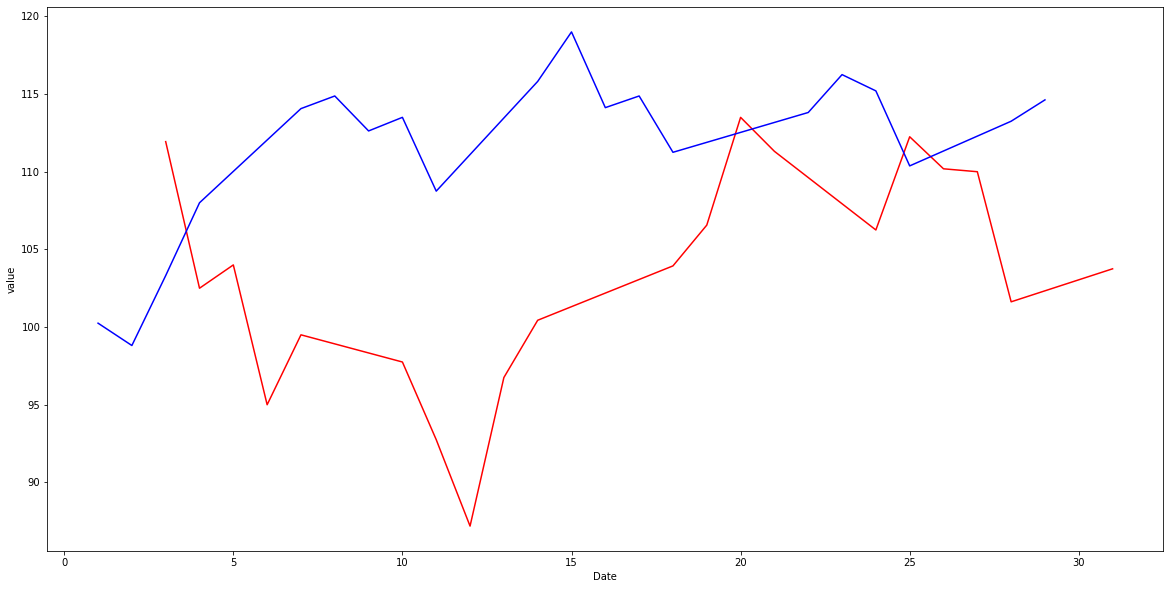

In [158]:
p, ax = plt.subplots(figsize=(20, 10))
sns.lineplot('Date', 'value', data=c1,color='red',ax=ax)
sns.lineplot('Date', 'value', data=c2,color='blue',ax=ax)